In [183]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (20, 10)

In [65]:
if os.path.isfile("final_200frames_segment-11392401368700458296_1086_429_1106_429_with_camera_labels.xlsx"):
    filepath = "final_200frames_segment-11392401368700458296_1086_429_1106_429_with_camera_labels.xlsx"

frame_final = pd.read_excel(filepath)
print("done")

done


In [66]:
frame_final.astype('float64');
frame_final.head()

,Frame,Time (s),Flow (veh/h),Density (veh/km),Spacing (m),Headway (s),Space mean speed (km/hr),AV distance travelled (m),AV heading (deg),AV speed (km/hr),Number of cars detected,Upstream car range,Downstream car range
0,2,0.1,1394.896996,21.424880,46.674708,2.580836,65.106410,2.061279,0.000000,74.206052,3,65.632774,-74.391349
1,3,0.2,1392.232071,21.392247,46.745908,2.585776,65.081152,4.127647,-0.133236,74.389223,3,65.437948,-74.799776
2,4,0.3,1387.553966,21.359828,46.816856,2.594494,64.960914,6.185638,-0.260478,74.087707,3,65.232916,-75.217652
3,5,0.4,1387.553966,21.295227,46.958880,2.322098,64.960914,10.305914,-0.352923,74.164955,3,64.799769,-76.076870
4,6,0.5,1379.072044,21.270440,47.013601,2.610451,64.835143,12.374665,-0.488549,74.475031,3,64.523546,-76.517259


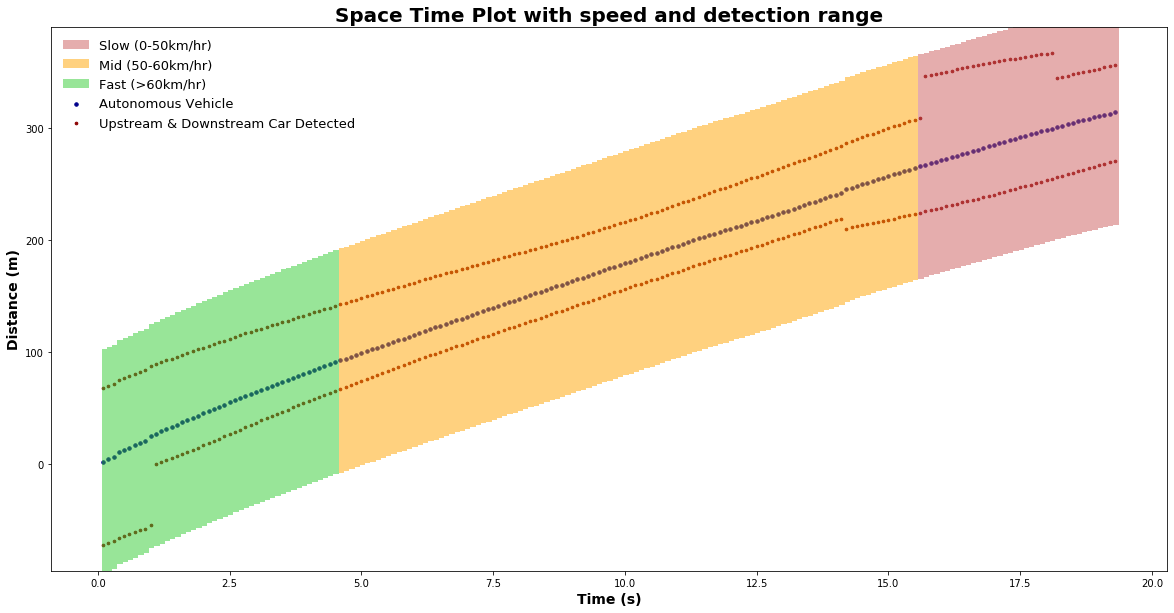

In [200]:
time_space = plt.scatter(x=frame_final['Time (s)'], y=frame_final['AV distance travelled (m)'], s=12, c="darkblue")
upstream_car = plt.scatter(x=frame_final['Time (s)'], y=frame_final["AV distance travelled (m)"] + frame_final['Upstream car range'], s=7, c="darkred")
downstream_car = plt.scatter(x=frame_final['Time (s)'], y=frame_final["AV distance travelled (m)"] + frame_final['Downstream car range'], s=7, c="darkred")
plt.xlabel("Time (s)",fontweight ='bold', size=14)
plt.ylabel("Distance (m)", fontweight ='bold',size=14)
plt.title("Space Time Plot with speed and detection range", fontweight ='bold',size=20)

for i in range(len(frame_final.iloc[:,0])):
    # left, bottom, width, height = (frame_final.iloc[i,1]-0.03, frame_final.iloc[i,7] + frame_final.iloc[i,12], 0.1, frame_final.iloc[i,11] - frame_final.iloc[i,12])
    left, bottom, width, height = (frame_final.iloc[i,1]-0.03, frame_final.iloc[i,7] - 100, 0.1, 200)

    if 0 < frame_final.iloc[i,9] < 50:
        rect1=mpatches.Rectangle((left,bottom),width,height, alpha=0.5, facecolor="indianred")
        plt.gca().add_patch(rect1)
    elif 50 < frame_final.iloc[i,9] < 60:
        rect2=mpatches.Rectangle((left,bottom),width,height, alpha=0.5, facecolor="orange")
        plt.gca().add_patch(rect2)
    else:
        rect3=mpatches.Rectangle((left,bottom),width,height, alpha=0.5, facecolor="limegreen")
        plt.gca().add_patch(rect3)

custom_line = [rect1, rect2, rect3, time_space, upstream_car]

plt.legend(custom_line, ['Slow (0-50km/hr)', 'Mid (50-60km/hr)', 'Fast (>60km/hr)', "Autonomous Vehicle", "Upstream & Downstream Car Detected"], frameon=False, prop={"size":13});

frame_img = 'space_time_graph.png'
plt.savefig(frame_img)